# Energy Consumption Forecasting

*Building a prediction model for energy consumption using weather data*

In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
df_path = "/kaggle/input/historic-sensor-data/energie-simulator-feat-214-data-gen-new-dataset-assets-sensor-data/assets/sensor-data/historic-data/"

## Inspect the data

In [3]:
df = pd.read_parquet(df_path + "2013-01-01.parquet")

In [4]:
df.head()

,house_id,kWh,air_temperature,wind_direction,wind_speed,prcp_amt,glbl_irad_amt
time,,,,,,,
2013-01-01,MAC000002,0.460,8.9,230.0,8.0,0.0,0.0
2013-01-01,MAC000003,3.888,8.9,230.0,8.0,0.0,0.0
2013-01-01,MAC000004,0.000,8.9,230.0,8.0,0.0,0.0
2013-01-01,MAC000005,0.207,8.9,230.0,8.0,0.0,0.0
2013-01-01,MAC000006,0.000,8.9,230.0,8.0,0.0,0.0


In [5]:
df.dtypes

house_id            object
kWh                float64
air_temperature    float64
wind_direction     float64
wind_speed         float64
prcp_amt           float64
glbl_irad_amt      float64
dtype: object

In [6]:
df.shape

(132220, 7)

In [7]:
df.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 00:00:00',
               '2013-01-01 00:00:00', '2013-01-01 00:00:00',
               '2013-01-01 00:00:00', '2013-01-01 00:00:00',
               '2013-01-01 00:00:00', '2013-01-01 00:00:00',
               '2013-01-01 00:00:00', '2013-01-01 00:00:00',
               ...
               '2013-01-01 23:00:00', '2013-01-01 23:00:00',
               '2013-01-01 23:00:00', '2013-01-01 23:00:00',
               '2013-01-01 23:00:00', '2013-01-01 23:00:00',
               '2013-01-01 23:00:00', '2013-01-01 23:00:00',
               '2013-01-01 23:00:00', '2013-01-01 23:00:00'],
              dtype='datetime64[ns]', name='time', length=132220, freq=None)

## Build the dataset

In [8]:
dfs = []

for filename in os.listdir(df_path):
    filepath = os.path.join(df_path, filename)
    df = pd.read_parquet(filepath)
    
    dfs.append(df)
    
df = pd.concat(dfs)

In [9]:
df.shape

(46519025, 7)

In [10]:
df.sample(10)

,house_id,kWh,air_temperature,wind_direction,wind_speed,prcp_amt,glbl_irad_amt
time,,,,,,,
2013-05-10 05:00:00,MAC000090,0.664,7.2,10.0,2.0,0.0,11.0
2013-06-04 09:00:00,MAC005336,0.114,14.4,50.0,8.0,0.0,2258.0
2013-10-26 09:00:00,MAC003110,0.191,16.3,220.0,16.0,0.2,526.0
2013-01-20 03:00:00,MAC003267,0.140,-0.9,40.0,10.0,0.0,0.0
2013-03-19 23:00:00,MAC003698,0.322,2.7,50.0,6.0,0.0,0.0
2013-01-31 16:00:00,MAC003232,0.562,9.3,260.0,14.0,0.0,252.0
2013-07-19 10:00:00,MAC000250,0.104,24.6,70.0,11.0,0.0,2521.0
2013-02-03 07:00:00,MAC002233,0.343,1.5,220.0,10.0,0.0,0.0
2013-10-17 16:00:00,MAC000077,0.357,17.3,250.0,10.0,0.0,648.0


### Extract a single sensor from the dataset

In [5]:
df = df[df['house_id']== 'MAC000002']
df = df.drop(['house_id'], axis=1)

In [5]:
df.sample(10)

,kWh,air_temperature,wind_direction,wind_speed,prcp_amt,glbl_irad_amt
time,,,,,,
2013-10-15 21:00:00,1.749,9.5,350.0,4.0,0.0,0.0
2013-12-09 11:00:00,0.266,9.6,220.0,6.0,0.0,656.0
2013-04-13 09:00:00,1.496,9.9,170.0,9.0,0.0,1367.0
2013-03-03 02:00:00,0.244,-1.8,340.0,1.0,0.0,0.0
2013-01-24 13:00:00,0.379,2.1,70.0,7.0,0.0,174.0
2013-01-02 00:00:00,0.464,3.4,260.0,7.0,0.0,0.0
2013-01-19 23:00:00,0.482,-0.3,30.0,9.0,0.0,0.0
2013-01-23 23:00:00,0.495,2.0,90.0,11.0,0.0,0.0
2013-06-16 07:00:00,0.222,13.1,230.0,8.0,0.0,604.0


In [6]:
df.shape

(8760, 6)

### Repeat the same data for 5 more years

In [ ]:
total_df = df.copy()
for i in range(5):
    new_index = df.index + pd.offsets.DateOffset(years=i+1)
    new_df = df.copy()
    new_df.index = new_index
    total_df = pd.concat([total_df, new_df])
    
df = total_df.sort_index()

### Standardize the data

In [7]:
df['kWh'] = df['kWh'] * 1000
df = df.rename(columns={'kWh': 'Wh'})

In [8]:
df.head()

,Wh,air_temperature,wind_direction,wind_speed,prcp_amt,glbl_irad_amt
time,,,,,,
2013-01-01 00:00:00,460.0,8.9,230.0,8.0,0.0,0.0
2013-01-01 01:00:00,426.0,8.7,240.0,9.0,0.0,0.0
2013-01-01 02:00:00,411.0,8.4,280.0,9.0,0.0,0.0
2013-01-01 03:00:00,395.0,7.5,290.0,8.0,0.4,0.0
2013-01-01 04:00:00,221.0,6.9,280.0,9.0,0.0,0.0


## Plot the data

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
color_palette = ["#F8766D", "#D39200", "#93AA00","#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]

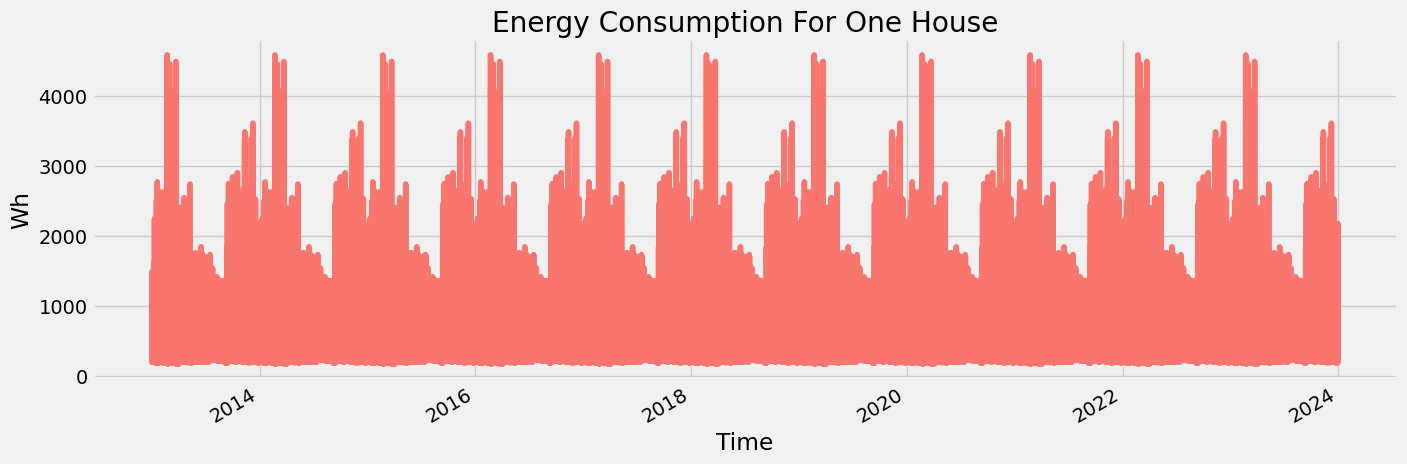

In [27]:
energy_consumption_one_house = df['Wh']

energy_consumption_one_house.plot(figsize=(15, 5), color=color_palette[0])
plt.title('Energy Consumption For One House')
plt.xlabel('Time')
plt.ylabel('Wh')
plt.show()

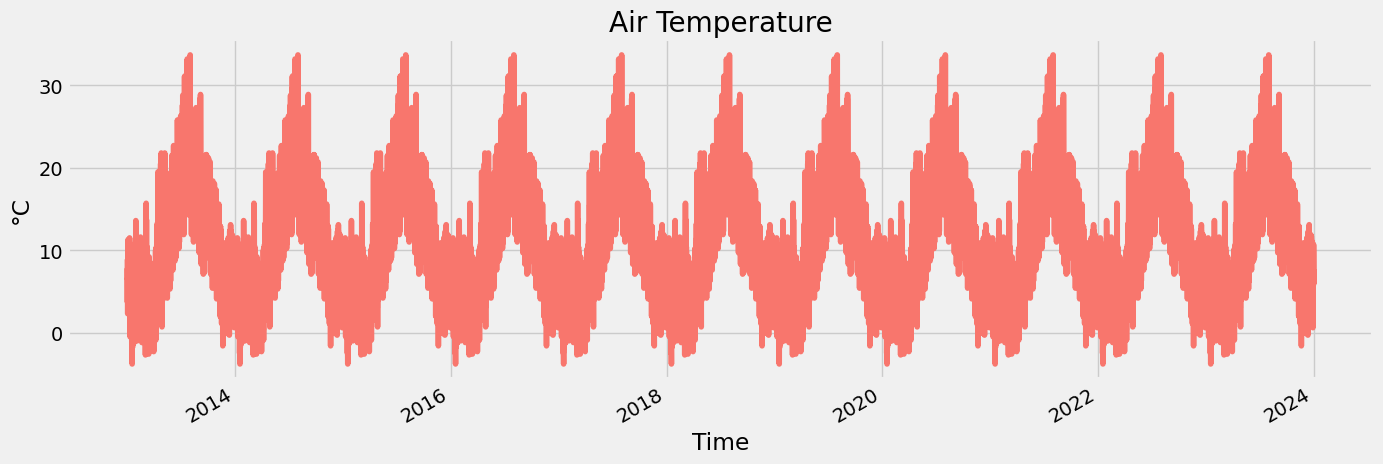

In [28]:
air_temperature_one_house = df['air_temperature']

air_temperature_one_house.plot(figsize=(15, 5), color=color_palette[0])
plt.title('Air Temperature')
plt.xlabel('Time')
plt.ylabel('°C')
plt.show()

## Feature Extraction

*Extract more features from the time data*

In [9]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

def create_features(df):
    cal = calendar()
    holidays = cal.holidays(start='2013-01-01', end='2013-12-31')
    
    df = df.copy()
    
    
    df['date'] = df.index
    
    df['holiday'] = df['date'].dt.normalize().isin(holidays)
    
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter
    
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    
        
    return df.drop('date', axis=1)

df = create_features(df)

In [10]:
df.sample(10)

,Wh,air_temperature,wind_direction,wind_speed,prcp_amt,glbl_irad_amt,holiday,hour,dayofweek,month,quarter,dayofyear,dayofmonth,weekofyear
time,,,,,,,,,,,,,,
2018-02-04 18:00:00,424.0,7.1,260.0,14.0,0.0,0.0,False,18,6,2,1,35,4,5
2013-02-19 13:00:00,1019.0,9.1,250.0,3.0,0.0,1652.0,False,13,1,2,1,50,19,8
2014-12-27 10:00:00,191.0,9.9,230.0,21.0,0.0,59.0,False,10,5,12,4,361,27,52
2015-03-03 15:00:00,191.0,7.7,100.0,12.0,0.0,401.0,False,15,1,3,1,62,3,10
2014-03-09 06:00:00,218.0,5.9,20.0,4.0,0.0,0.0,False,6,6,3,1,68,9,10
2016-06-19 13:00:00,247.0,25.1,300.0,6.0,0.0,3011.0,False,13,6,6,2,171,19,24
2013-03-24 01:00:00,462.0,1.2,60.0,11.0,0.0,0.0,False,1,6,3,1,83,24,12
2016-03-06 01:00:00,479.0,8.6,40.0,3.0,0.0,0.0,False,1,6,3,1,66,6,9
2015-02-18 22:00:00,471.0,2.4,90.0,3.0,0.0,0.0,False,22,2,2,1,49,18,8


In [19]:
df[df.index == "2013-12-25 10:00"]

,house_id,Wh,air_temperature,wind_direction,wind_speed,prcp_amt,glbl_irad_amt,holiday,hour,dayofweek,month,quarter,dayofyear,dayofmonth,weekofyear
time,,,,,,,,,,,,,,,
2013-12-25 10:00:00,MAC000002,191.0,5.2,190.0,8.0,0.0,223.0,True,10,2,12,4,359,25,52


In [20]:
df.dtypes

house_id            object
Wh                 float64
air_temperature    float64
wind_direction     float64
wind_speed         float64
prcp_amt           float64
glbl_irad_amt      float64
holiday               bool
hour                 int32
dayofweek            int32
month                int32
quarter              int32
dayofyear            int32
dayofmonth           int32
weekofyear          UInt32
dtype: object

## Plot the new features

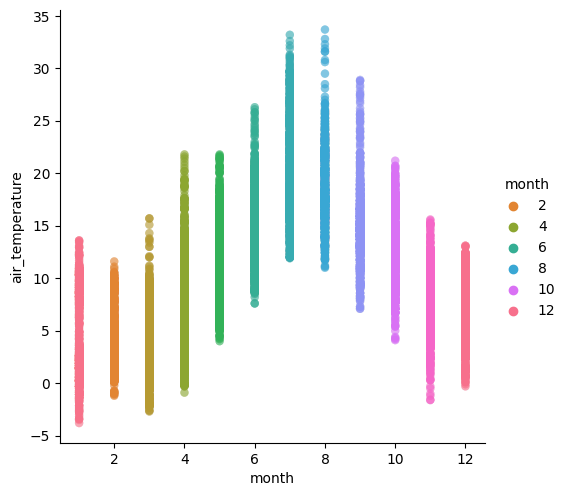

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df,
    hue='month',
    x_vars=['month'],
    y_vars=['air_temperature'],
    height=5,
    plot_kws={'alpha': 0.15, 'linewidth': 0},
    palette="husl"
)
plt.show()

## Train/Test Split

In [9]:
clean_df = df.drop(['Wh','wind_direction','wind_speed', 'prcp_amt','glbl_irad_amt'], axis=1)
clean_df.sample(10)

,air_temperature
time,
2018-01-07 23:00:00,9.1
2014-03-26 06:00:00,0.6
2018-04-27 23:00:00,4.7
2014-08-08 06:00:00,13.2
2014-11-09 22:00:00,6.7
2015-02-18 11:00:00,6.0
2013-07-27 09:00:00,21.4
2015-11-02 15:00:00,13.7
2014-05-18 01:00:00,9.1


In [9]:
clean_df = clean_df.drop(['holiday', 'hour', 'dayofweek', 'month', 'quarter', 'dayofyear',
       'dayofmonth', 'weekofyear'], axis=1)
clean_df.head()

KeyError: "['holiday', 'hour', 'dayofweek', 'month', 'quarter', 'dayofyear', 'dayofmonth', 'weekofyear'] not found in axis"

In [10]:
split_date = '01-Jun-2018'
train = clean_df.loc[clean_df.index <= split_date].copy()
test = clean_df.loc[clean_df.index > split_date].copy()

In [11]:
train.head()

,air_temperature
time,
2013-01-01 00:00:00,8.9
2013-01-01 01:00:00,8.7
2013-01-01 02:00:00,8.4
2013-01-01 03:00:00,7.5
2013-01-01 04:00:00,6.9


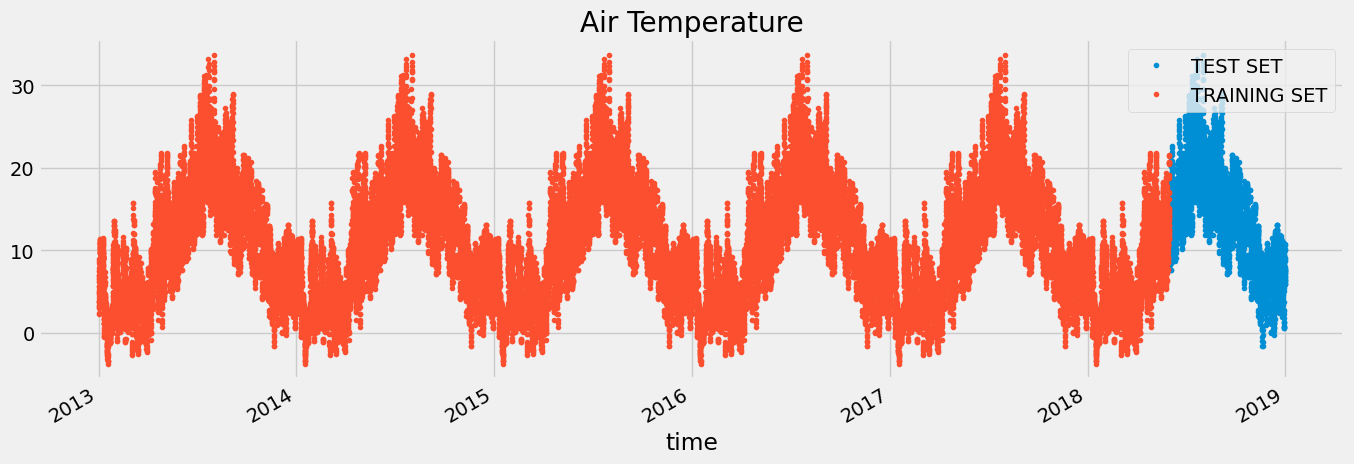

In [12]:
test \
    .rename(columns={'air_temperature': 'TEST SET'}) \
    .join(train.rename(columns={'air_temperature': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title='Air Temperature', style='.')
plt.show()

In [13]:
train.reset_index().rename(columns={'time': 'ds', 'air_temperature': 'y'}).head()

,ds,y
0,2013-01-01 00:00:00,8.9
1,2013-01-01 01:00:00,8.7
2,2013-01-01 02:00:00,8.4
3,2013-01-01 03:00:00,7.5
4,2013-01-01 04:00:00,6.9


## Prophet Forecasting

*Using fbprophet*

In [14]:
from prophet import Prophet

*prophet expects a `ds` and `y` column*

In [15]:
model = Prophet()
model.fit(train.reset_index().rename(columns={'time':'ds', 'air_temperature': 'y'}))

17:19:03 - cmdstanpy - INFO - Chain [1] start processing
17:19:16 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
test_forecast = model.predict(df=test.reset_index().rename(columns={'time': 'ds'}))

In [40]:
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-06-01 01:00:00,10.923183,8.055558,15.379562,10.923183,10.923183,0.650995,0.650995,0.650995,-1.909690,...,0.010220,0.010220,0.010220,2.550466,2.550466,2.550466,0.0,0.0,0.0,11.574178
1,2018-06-01 02:00:00,10.923184,7.750275,15.153815,10.923184,10.923184,0.364453,0.364453,0.364453,-2.210496,...,0.016592,0.016592,0.016592,2.558356,2.558356,2.558356,0.0,0.0,0.0,11.287637
2,2018-06-01 03:00:00,10.923185,7.386174,14.778555,10.923185,10.923185,0.141154,0.141154,0.141154,-2.447814,...,0.022745,0.022745,0.022745,2.566224,2.566224,2.566224,0.0,0.0,0.0,11.064339
3,2018-06-01 04:00:00,10.923185,7.269307,14.637534,10.923185,10.923185,-0.004816,-0.004816,-0.004816,-2.607504,...,0.028620,0.028620,0.028620,2.574067,2.574067,2.574067,0.0,0.0,0.0,10.918370
4,2018-06-01 05:00:00,10.923186,7.203842,14.350734,10.923186,10.923186,-0.007962,-0.007962,-0.007962,-2.624014,...,0.034165,0.034165,0.034165,2.581887,2.581887,2.581887,0.0,0.0,0.0,10.915224


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


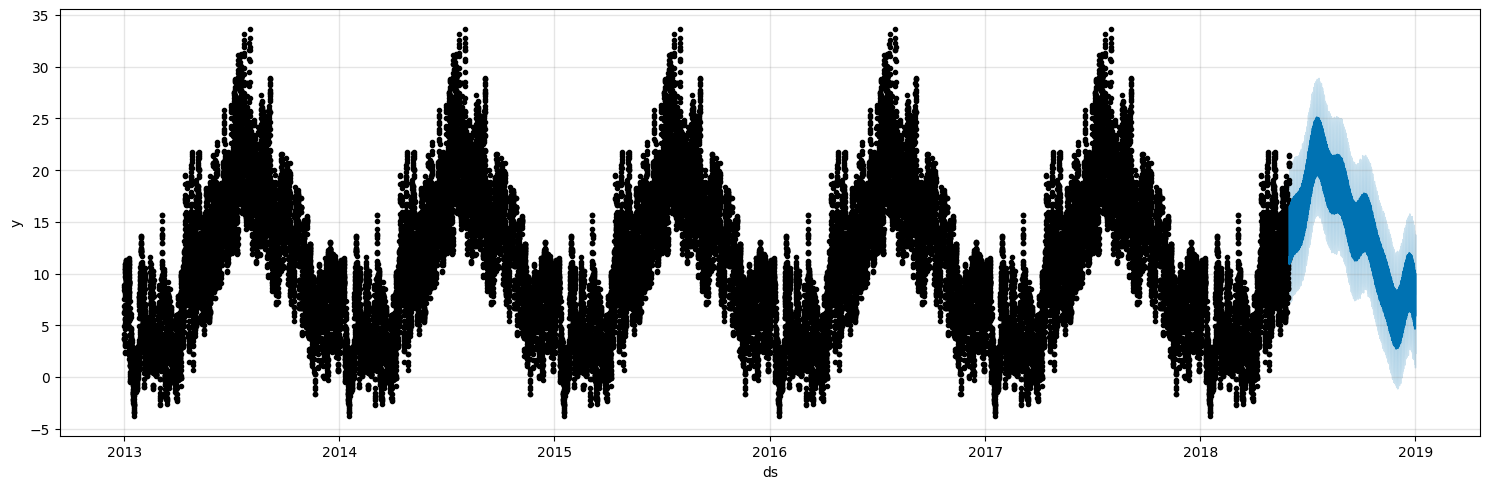

In [41]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(test_forecast,ax=ax)
plt.show()

In [46]:
test_forecast.dtypes

ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
daily                                float64
daily_lower                          float64
daily_upper                          float64
weekly                               float64
weekly_lower                         float64
weekly_upper                         float64
yearly                               float64
yearly_lower                         float64
yearly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
dtype: obj

In [17]:
one_day_test_forecast = test_forecast[test_forecast['ds'] <= '02-Jun-2018']
one_day_test_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-06-01 01:00:00,10.923183,8.040081,14.952484,10.923183,10.923183,0.650995,0.650995,0.650995,-1.909690,...,0.010220,0.010220,0.010220,2.550466,2.550466,2.550466,0.0,0.0,0.0,11.574178
1,2018-06-01 02:00:00,10.923184,7.616215,14.922737,10.923184,10.923184,0.364453,0.364453,0.364453,-2.210496,...,0.016592,0.016592,0.016592,2.558356,2.558356,2.558356,0.0,0.0,0.0,11.287637
2,2018-06-01 03:00:00,10.923185,7.202428,14.648897,10.923185,10.923185,0.141154,0.141154,0.141154,-2.447814,...,0.022745,0.022745,0.022745,2.566224,2.566224,2.566224,0.0,0.0,0.0,11.064339
3,2018-06-01 04:00:00,10.923185,7.164912,15.090245,10.923185,10.923185,-0.004816,-0.004816,-0.004816,-2.607504,...,0.028620,0.028620,0.028620,2.574067,2.574067,2.574067,0.0,0.0,0.0,10.918370
4,2018-06-01 05:00:00,10.923186,7.492553,14.476859,10.923186,10.923186,-0.007962,-0.007962,-0.007962,-2.624014,...,0.034165,0.034165,0.034165,2.581887,2.581887,2.581887,0.0,0.0,0.0,10.915224
5,2018-06-01 06:00:00,10.923187,7.438707,14.860541,10.923187,10.923187,0.228192,0.228192,0.228192,-2.400819,...,0.039328,0.039328,0.039328,2.589684,2.589684,2.589684,0.0,0.0,0.0,11.151379
6,2018-06-01 07:00:00,10.923187,8.445047,15.466242,10.923187,10.923187,0.765073,0.765073,0.765073,-1.876445,...,0.044062,0.044062,0.044062,2.597456,2.597456,2.597456,0.0,0.0,0.0,11.688260
7,2018-06-01 08:00:00,10.923188,8.562616,16.102943,10.923188,10.923188,1.568807,1.568807,1.568807,-1.084724,...,0.048327,0.048327,0.048327,2.605204,2.605204,2.605204,0.0,0.0,0.0,12.491995
8,2018-06-01 09:00:00,10.923189,9.723445,16.834427,10.923189,10.923189,2.509830,2.509830,2.509830,-0.155184,...,0.052086,0.052086,0.052086,2.612928,2.612928,2.612928,0.0,0.0,0.0,13.433018
9,2018-06-01 10:00:00,10.923189,10.551838,18.026368,10.923189,10.923189,3.427396,3.427396,3.427396,0.751462,...,0.055306,0.055306,0.055306,2.620628,2.620628,2.620628,0.0,0.0,0.0,14.350585


### Compare with real data

In [18]:
one_day_test = test[test.index <= '02-Jun-2018']

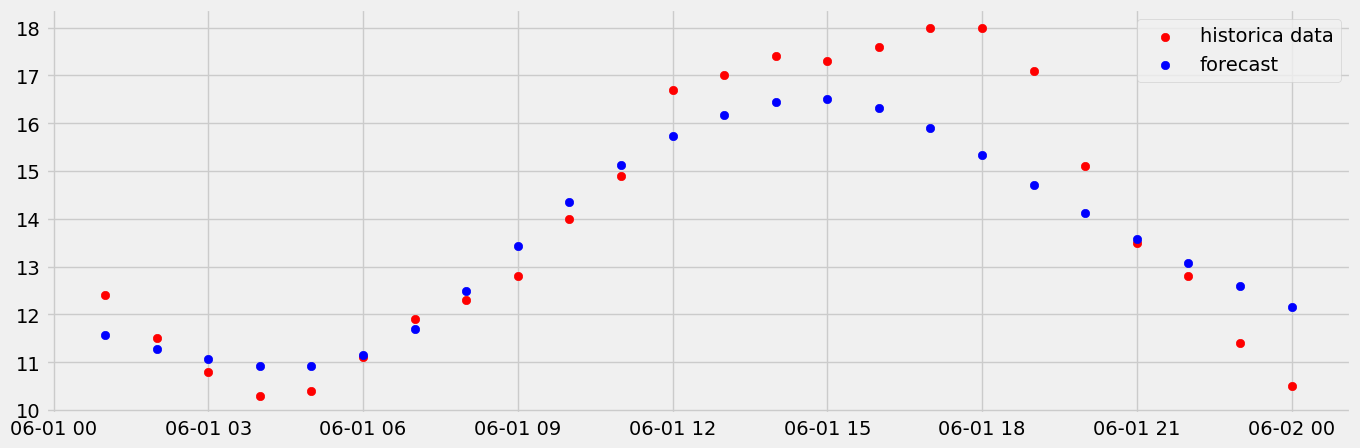

In [23]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(one_day_test.index, one_day_test['air_temperature'], color='r', label='historical data')
ax.scatter(one_day_test_forecast['ds'], one_day_test_forecast['yhat'], color='b', label='forecast')
plt.legend()

# VAR Forecasting

In [74]:
from statsmodels.tsa.api import VAR

*make stationary*

In [75]:
df_diff = df.diff().dropna()

In [76]:
model = VAR(df_diff)
result = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [77]:
var_forecast = result.forecast(df_diff.values, steps=1000)
forecast_df = pd.DataFrame(var_forecast, index=pd.date_range(start='2024-01-01', periods=1000))

In [78]:
forecast_df.head()

,0,1,2,3,4,5
2024-01-01,1.505964,0.378378,0.166972,1.002573,-0.010317,29.351991
2024-01-02,12.666080,0.152516,0.611954,-0.077340,0.003941,20.352482
2024-01-03,-0.300430,0.074662,-0.087663,0.099761,-0.003419,11.097709
2024-01-04,1.917266,0.035030,0.146481,0.012987,0.000806,5.573790
2024-01-05,0.213662,0.017312,-0.013187,0.014680,-0.000702,2.799897


*Prophet seems to be more accurate here*